In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%cd ..

c:\Users\Ege\Documents\egemenkopuz\projects\inpainting-in-medical-imaging


In [5]:
%pwd

'c:\\Users\\Ege\\Documents\\egemenkopuz\\projects\\inpainting-in-medical-imaging'

In [6]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from glob import glob
import os

In [33]:
df = pd.DataFrame(
    {
        "experiment": pd.Series(dtype="str"),
        "noise": pd.Series(dtype="str"),
        "step": pd.Series(dtype="int"),
    }
)
len(df)

0

In [ ]:
df = pd.DataFrame(
    {
        "experiment": pd.Series(dtype="str"),
        "noise": pd.Series(dtype="str"),
        "step": pd.Series(dtype="int"),
    }
)
df_ce03_dice07_none = pd.DataFrame(
    {
        "experiment": pd.Series(dtype="str"),
        "noise": pd.Series(dtype="str"),
        "step": pd.Series(dtype="int"),
    }
)
df_ce03_dice07_vr = pd.DataFrame(
    {
        "experiment": pd.Series(dtype="str"),
        "noise": pd.Series(dtype="str"),
        "step": pd.Series(dtype="int"),
    }
)

for path in glob("final_results/abl*/*/scalars.csv"):
    tags = os.path.normpath(path).split(os.sep)[-3].split()
    if "noise_r" in tags:
        noise = "w/ radius noise"
        tags.remove("noise_r")
    elif "noise_v" in tags:
        noise = "w/ value noise"
        tags.remove("noise_v")
    elif "noise_vr" in tags:
        noise = "w/ radius & value noise"
        tags.remove("noise_vr")
    else:
        noise = "none"
    experiment = " ".join(tags[1:-2])
    
    df_scalars = pd.read_csv(path)
    if noise == "none" and experiment in ["shape ce03_dice07", "grade ce03_dice07"]:
        if len(df_ce03_dice07_none) == 0:
            df_ce03_dice07_none = df_ce03_dice07_none.append(df_scalars)
            df_ce03_dice07_none["experiment"] = "ce03_dice07"
            df_ce03_dice07_none["noise"] = noise
        else:
            df_ce03_dice07_none = pd.merge(df_ce03_dice07_none,df_scalars, on=["step"])
    elif noise == "w/ radius & value noise" and experiment in ["shape ce03_dice07", "grade ce03_dice07"]:
        if len(df_ce03_dice07_vr) == 0:
            df_ce03_dice07_vr = df_ce03_dice07_vr.append(df_scalars)
            df_ce03_dice07_vr["experiment"] = "ce03_dice07"
            df_ce03_dice07_vr["noise"] = noise
        else:
            df_ce03_dice07_vr = pd.merge(df_ce03_dice07_vr,df_scalars, on=["step"])
    else:
        if experiment == "shape ce025_dice045_hausdorff03":
            experiment = "ce025_dice045_hausdorff03"
        df_scalars["experiment"] = experiment
        df_scalars["noise"] = noise
        df = pd.concat((df, df_scalars), ignore_index=True)

path = glob(
    "final_results/baseline shape grade updated metrics 10-02-2022 21-44-58/*/scalars.csv"
)[0]
df_scalars = pd.read_csv(path)
df_scalars["experiment"] = "baseline"
df_scalars["noise"] = "none"
df = pd.concat((df, df_scalars), ignore_index=True)
del df_scalars

df = pd.concat((df, df_ce03_dice07_none), ignore_index=True)
del df_ce03_dice07_none
df = pd.concat((df, df_ce03_dice07_vr), ignore_index=True)
del df_ce03_dice07_vr

# df.to_csv("scalars.csv",index=False)


In [193]:
df = pd.read_csv("scalars.csv")

# Shape Mask

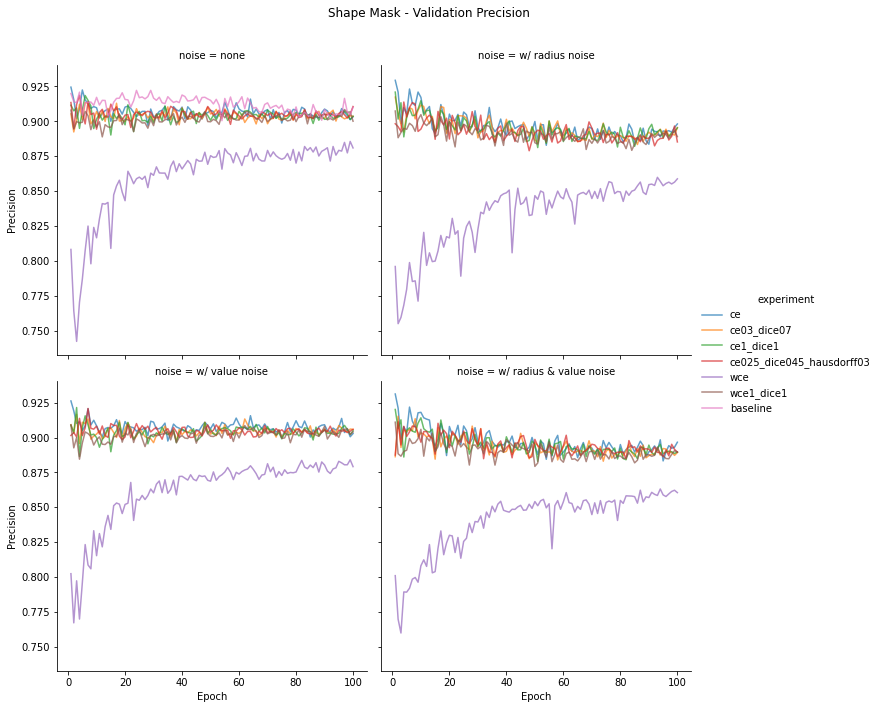

In [177]:
g = sns.FacetGrid(df, col="noise", hue="experiment", margin_titles=True, col_wrap=2, height=5)
g.map(sns.lineplot, "step", "val/epoch_shape_precision", alpha=.7, palette="colorblind")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Shape Mask - Validation Precision')
g.set(xlabel='Epoch', ylabel='Precision')
g.add_legend()
plt.show()

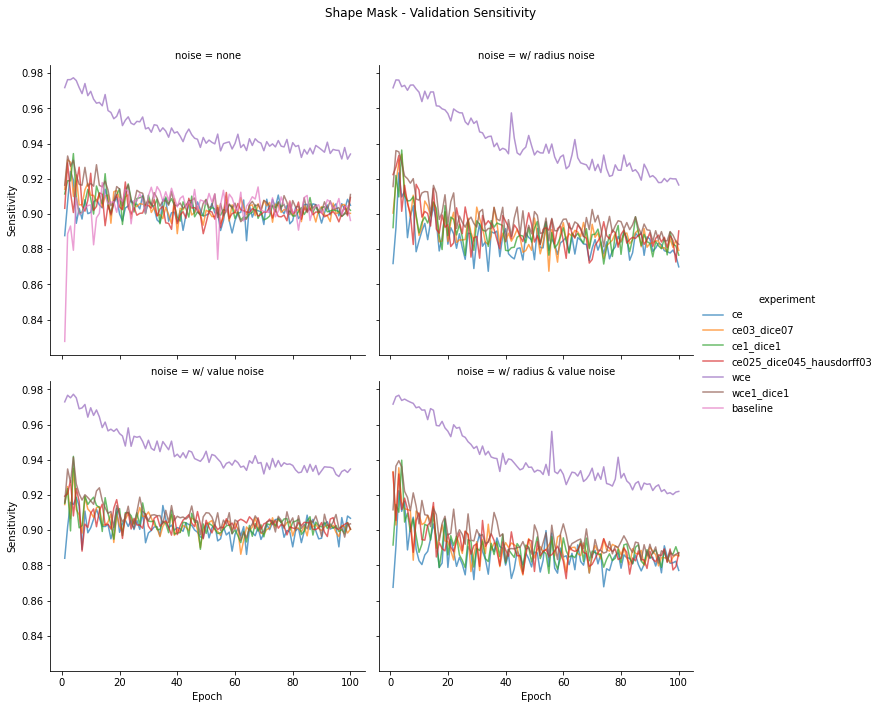

In [178]:
g = sns.FacetGrid(df, col="noise", hue="experiment", margin_titles=True, col_wrap=2, height=5)
g.map(sns.lineplot, "step", "val/epoch_shape_recall", alpha=.7, palette="colorblind")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Shape Mask - Validation Sensitivity')
g.set(xlabel='Epoch', ylabel='Sensitivity')
g.add_legend()
plt.show()

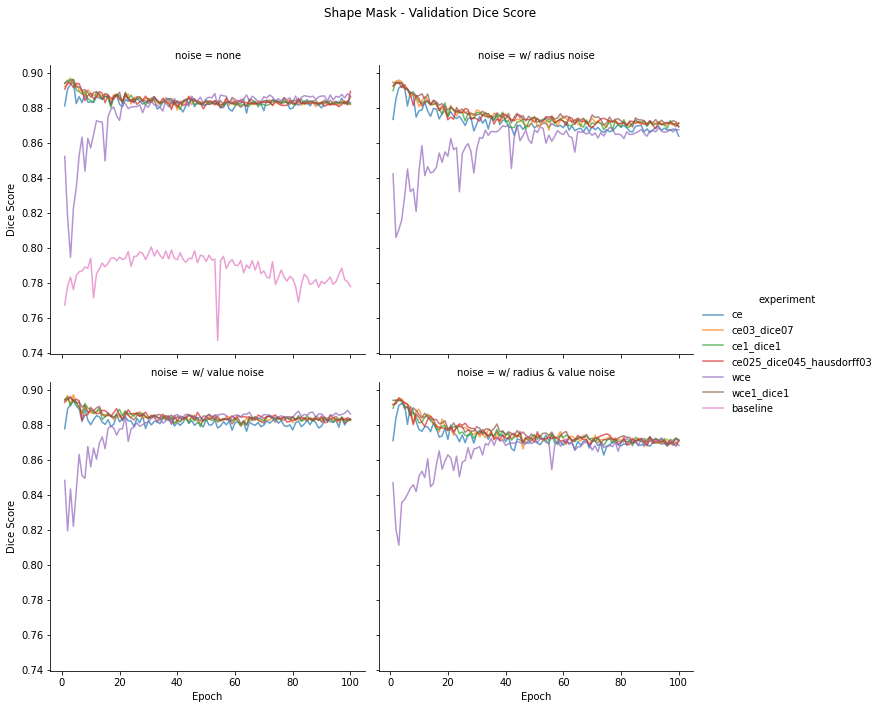

In [179]:
g = sns.FacetGrid(df, col="noise", hue="experiment", margin_titles=True, col_wrap=2, height=5)
g.map(sns.lineplot, "step", "val/epoch_shape_dice_score", alpha=.7, palette="colorblind")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Shape Mask - Validation Dice Score')
g.set(xlabel='Epoch', ylabel='Dice Score')
g.add_legend()
plt.show()

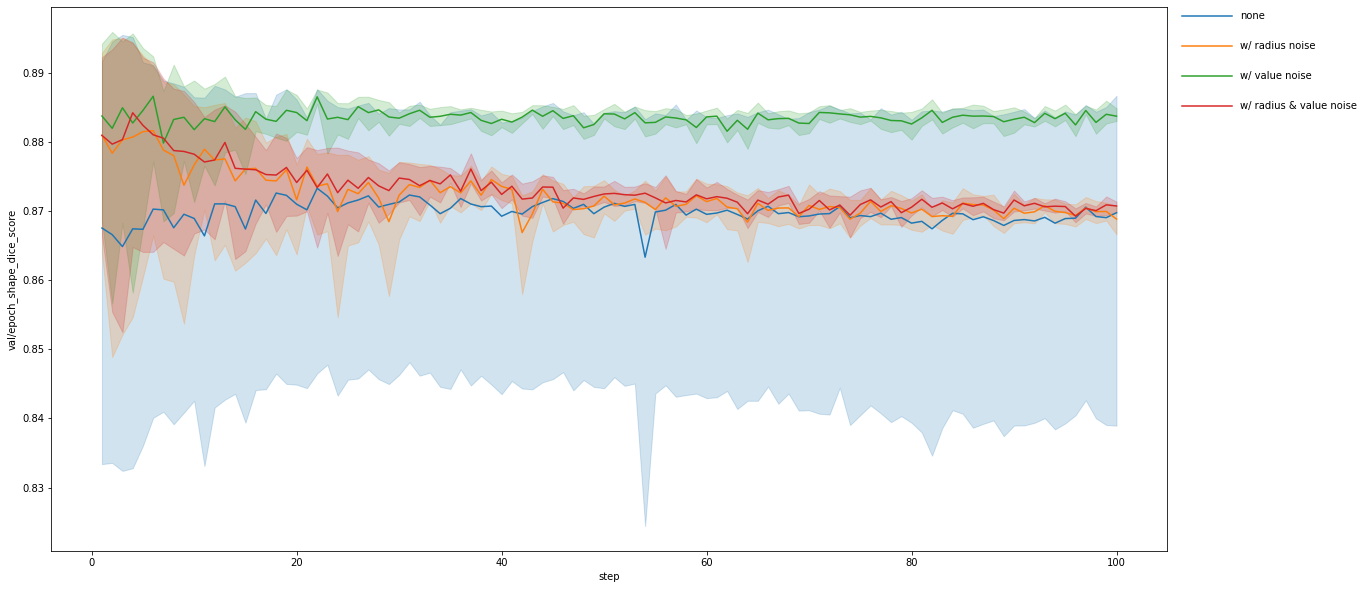

In [180]:
plt.rcParams["figure.figsize"] = (20, 10)
ax = sns.lineplot(data=df, x="step", y="val/epoch_shape_dice_score", hue="noise")
legend = ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, frameon=False, labelspacing=2., markerscale=1.5, handlelength=5)
plt.show()

# Tumor Label Mask

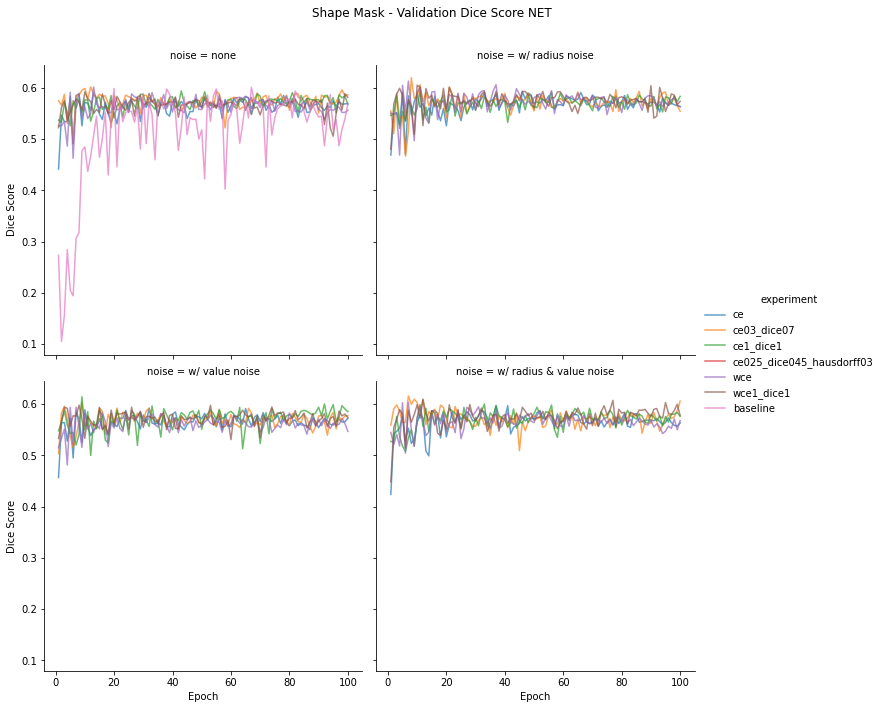

In [135]:
g = sns.FacetGrid(df, col="noise", hue="experiment", margin_titles=True, col_wrap=2, height=5)
g.map(sns.lineplot, "step", "val/epoch_grade_dice_score_net", alpha=.7, palette="colorblind")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Shape Mask - Validation Dice Score NET')
g.set(xlabel='Epoch', ylabel='Dice Score')
g.add_legend()
plt.show()

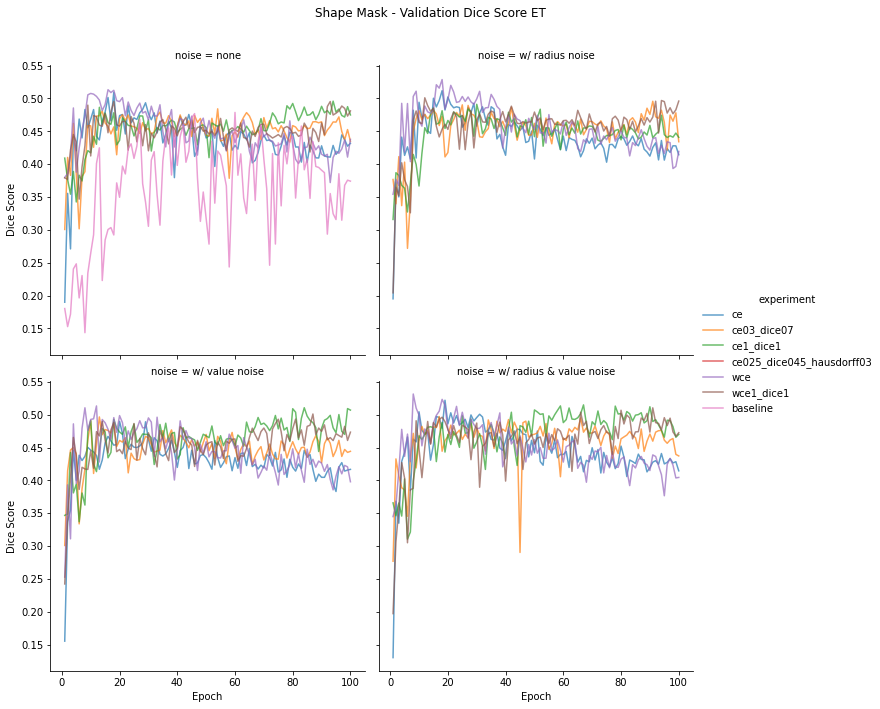

In [134]:
g = sns.FacetGrid(df, col="noise", hue="experiment", margin_titles=True, col_wrap=2, height=5)
g.map(sns.lineplot, "step", "val/epoch_grade_dice_score_et", alpha=.7, palette="colorblind")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Shape Mask - Validation Dice Score ET')
g.set(xlabel='Epoch', ylabel='Dice Score')
g.add_legend()
plt.show()

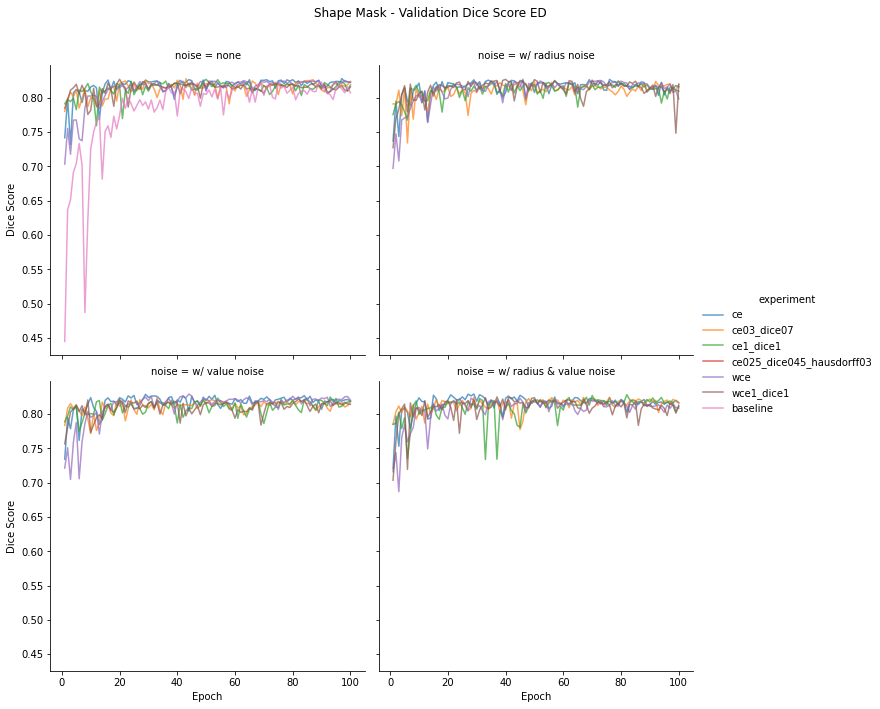

In [136]:
g = sns.FacetGrid(df, col="noise", hue="experiment", margin_titles=True, col_wrap=2, height=5)
g.map(sns.lineplot, "step", "val/epoch_grade_dice_score_ed", alpha=.7, palette="colorblind")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Shape Mask - Validation Dice Score ED')
g.set(xlabel='Epoch', ylabel='Dice Score')
g.add_legend()
plt.show()

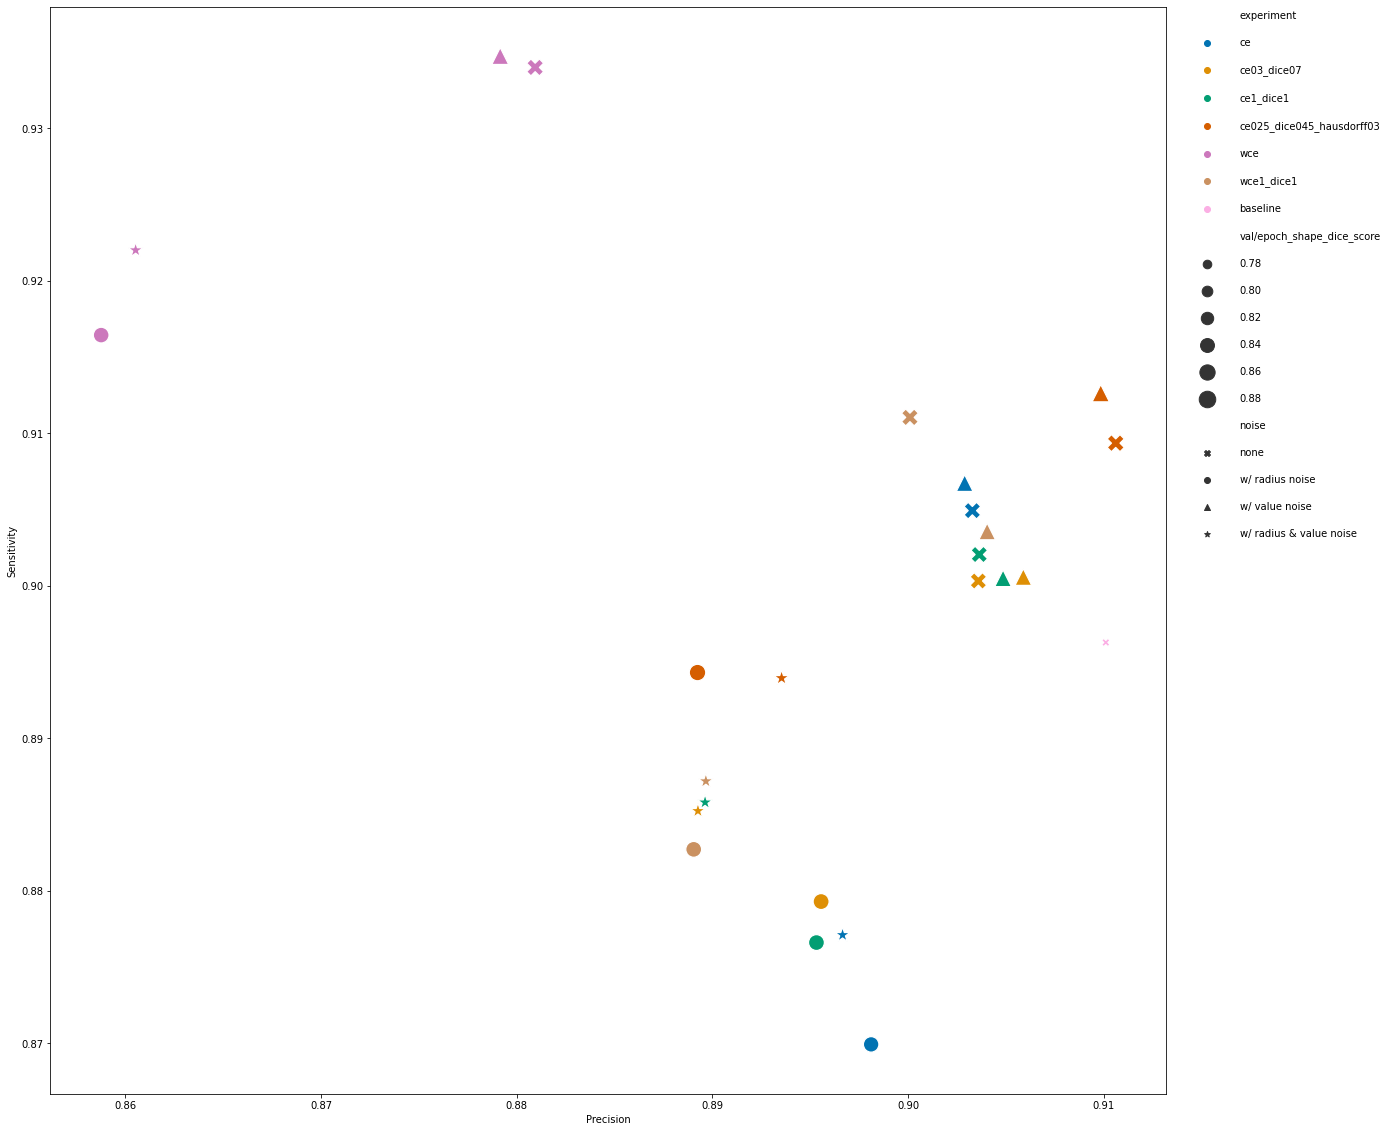

In [247]:
markers = {"w/ radius & value noise": "*", "w/ value noise": "^", "w/ radius noise": "o", "none": "X"}
plt.rcParams["figure.figsize"] = (20, 20)
ax = sns.scatterplot(
    data=df.where(df["step"] == 100),
    x="val/epoch_shape_precision",
    y="val/epoch_shape_recall",
    hue="experiment",
    sizes=(70, 300),
    size="val/epoch_shape_dice_score",
    style="noise",
    markers=markers,
    palette="colorblind"
)
ax.set(xlabel='Precision', ylabel='Sensitivity')
legend= ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, frameon=False, labelspacing=1.7, markerscale=1.0, handlelength=5)
plt.show()

In [245]:
final_df = df.where(df["step"] == 100)
final_df = final_df.dropna(axis=0, subset=["step"])
final_df.reset_index(drop=True, inplace=True)
cols = [c for c in final_df.columns if c.lower()[:3] != 'val' and c not in ["experiment", "noise"]]
final_df = final_df.drop(columns=cols)
final_df = final_df.drop(columns=["val/epoch_shape_loss","val/epoch_grade_loss"])
grade_cols = [c for c in final_df.columns if c.lower()[4:15] != 'epoch_grade' and c not in ["experiment", "noise"]]
shape_cols = [c for c in final_df.columns if c.lower()[4:15] != 'epoch_shape' and c not in ["experiment", "noise"]]
grade_df = final_df.drop(columns=grade_cols)
grade_df = grade_df.dropna()
shape_df = final_df.drop(columns=shape_cols)

for c in grade_df.columns:
    if c not in ["experiment", "noise"]:
        grade_df[c] = grade_df[c].astype('float').round(3)
for c in shape_df.columns:
    if c not in ["experiment", "noise"]:
        shape_df[c] = shape_df[c].astype('float').round(3)

grade_df["experiment"] = grade_df["experiment"] + " " + grade_df["noise"]
shape_df["experiment"] = shape_df["experiment"] + " " + shape_df["noise"]

grade_df = grade_df.drop(columns=["noise"]).sort_values('experiment')
shape_df = shape_df.drop(columns=["noise"]).sort_values('experiment')

grade_df.to_csv("grade_scalars.csv")
shape_df.to_csv("shape_scalars.csv")

grade_df

,experiment,val/epoch_grade_dice_score_ed,val/epoch_grade_dice_score_et,val/epoch_grade_dice_score_net,val/epoch_grade_precision_ed,val/epoch_grade_recall_ed,val/epoch_grade_precision_et,val/epoch_grade_recall_et,val/epoch_grade_precision_net,val/epoch_grade_recall_net
22,baseline none,0.807,0.374,0.569,0.861,0.816,0.410,0.467,0.603,0.575
0,ce none,0.823,0.432,0.569,0.832,0.867,0.453,0.400,0.588,0.555
3,ce w/ radius & value noise,0.817,0.415,0.563,0.837,0.854,0.425,0.423,0.604,0.526
1,ce w/ radius noise,0.816,0.414,0.564,0.829,0.863,0.444,0.389,0.601,0.557
2,ce w/ value noise,0.819,0.417,0.572,0.838,0.859,0.443,0.382,0.576,0.567
23,ce03_dice07 none,0.824,0.435,0.587,0.825,0.872,0.447,0.332,0.570,0.589
24,ce03_dice07 w/ radius & value noise,0.816,0.437,0.606,0.848,0.828,0.415,0.301,0.513,0.697
4,ce03_dice07 w/ radius noise,0.819,0.434,0.554,0.794,0.908,0.418,0.337,0.634,0.441
5,ce03_dice07 w/ value noise,0.818,0.444,0.577,0.834,0.856,0.426,0.360,0.558,0.576
6,ce1_dice1 none,0.819,0.475,0.568,0.827,0.861,0.426,0.387,0.576,0.534


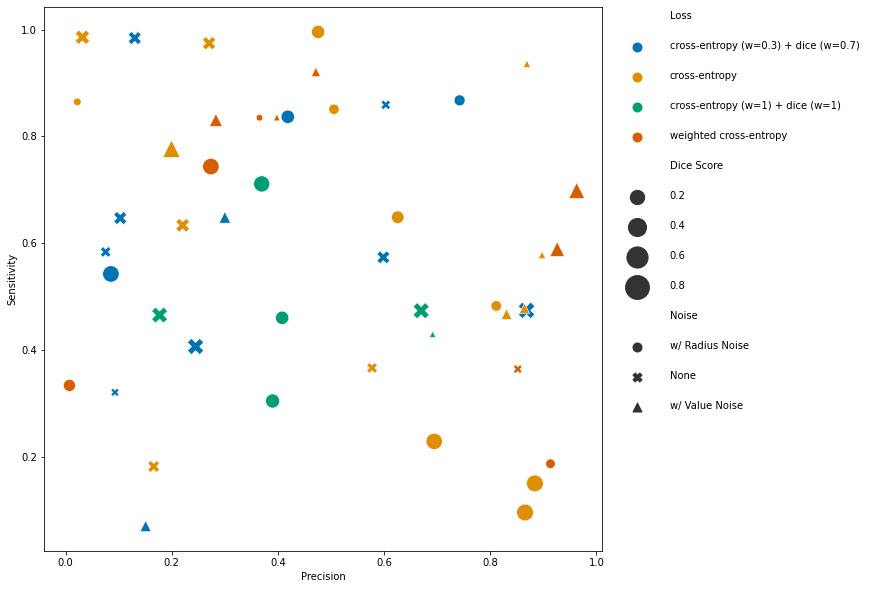

In [12]:

df_v = pd.DataFrame(columns=["Precision", "Sensitivity", "Dice Score"])
for i in range(1, 48):
    n = random.choice(["w/ Value Noise", "w/ Radius Noise", "None"])
    t = random.choice(
        ["cross-entropy", "cross-entropy (w=1) + dice (w=1)", "cross-entropy (w=0.3) + dice (w=0.7)", "weighted cross-entropy"]
    )
    df_v = df_v.append(
        {
            "Precision": np.random.random_sample(),
            "Sensitivity": np.random.random_sample(),
            "Dice Score": np.random.random_sample(),
            "Loss": t,
            "Noise": n,
        },
        ignore_index=True,
    )
markers = {"w/ Value Noise": "^", "w/ Radius Noise": "o", "None": "X"}
plt.rcParams["figure.figsize"] = (10, 10)
ax = sns.scatterplot(
    data=df_v,
    x="Precision",
    y="Sensitivity",
    hue="Loss",
    sizes=(40, 300),
    size="Dice Score",
    style="Noise",
    markers=markers,
    palette="colorblind"
)

legend= ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, frameon=False, labelspacing=2., markerscale=1.5, handlelength=5)
plt.show()
